In [1]:
# 複迴歸與 Logistic 迴歸

# Logistic 迴歸是預測機率的方法，屬於二元分類的應用領域。

In [4]:
#----------------------------------
# 建立複迴歸分析模型
#----------------------------------

# 使用連鎖蛋糕店的 店面面積（坪）與車站距離（公里）來預測分店單月銷售量（萬日圓）。

import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([
    [10, 80], [8, 0], [8, 200], [5, 200], [7, 300], 
    [8, 230], [7, 40], [9, 0], [6, 330], [9, 180]
])

y = np.array([469, 366, 371, 208, 246, 297, 363, 436, 198, 364])

lm = LinearRegression()
lm.fit(X, y)

# 印出係數，截距
print('係數: ',lm.coef_)
print('截距: ', lm.intercept_)

係數:  [41.51347826 -0.34088269]
截距:  65.32391638894825


In [8]:
#----------------------------------
# 利用複迴歸模型預測
#----------------------------------

import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([
    [10, 80], [8, 0], [8, 200], [5, 200], [7, 300], 
    [8, 230], [7, 40], [9, 0], [6, 330], [9, 180]
])

y = np.array([469, 366, 371, 208, 246, 297, 363, 436, 198, 364])

lm = LinearRegression()
lm.fit(X, y)

# 新蛋糕店資料
to_be_predicted = np.array([
    [10, 110]
])

predicted_sales = lm.predict(to_be_predicted)

# 預測新蛋糕店的單月銷量

print('預測銷量: ', predicted_sales)

預測銷量:  [442.96160353]


In [9]:
#----------------------------------
# 複迴歸模型的績效
#----------------------------------

# Mean squared error（MSE）
# R-squared 
# Adjusted R-squared。

mse = np.mean((lm.predict(X) -y)**2)
r_squared = lm.score(X,y)
adj_r_squared = r_squared - (1-r_squared)*(X.shape[1] / (X.shape[0] - X.shape[1]-1)) # ??

# 印出模型績效
print(mse)
print(r_squared)
print(adj_r_squared)

417.3006119994701
0.9452358526817111
0.9295889534479143


In [12]:
#----------------------------------
# 複迴歸模型的係數檢定
#----------------------------------
# 複迴歸模型我們通常還會檢定變數的顯著性，
# 以 P-value 是否小於 0.05（信心水準 95%）來判定。

In [14]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

X = np.array([
    [10, 80], [8, 0], [8, 200], [5, 200], [7, 300], [8, 230], [7, 40], [9, 0], [6, 330], [9, 180]
])
y = np.array([469, 366, 371, 208, 246, 297, 363, 436, 198, 364])

lm = LinearRegression()
lm.fit(X, y)

# 印出 p-value
print(f_regression(X, y)[1])

[0.00051435 0.00844837]


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 1)

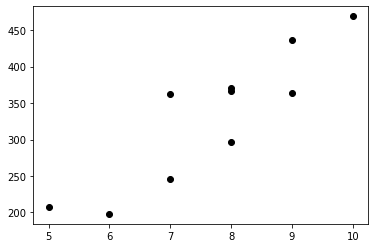

In [30]:
#----------------------------------
# 複迴歸模型視覺化 失敗
#----------------------------------

import matplotlib.pyplot as plt

plt.scatter(X[:,0], y, color='black')
# plt.scatter(X[:,1], y, color='blue')
plt.plot(X[:,0], lm.predict(np.reshape(X[:,0], (len(X[:,0]),1))), color='black', linewidth=1)
# plt.plot(X[:,1], lm.predict(X), color='blue', linewidth=1)
plt.show()

In [32]:
#----------------------------------
# 建立 Logistic 迴歸模型
#----------------------------------
# 在Kaggle 著名的鐵達尼克號資料，
# 我們使用 Sex，Pclass 與 Age 來預測 Survived。

In [36]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, linear_model

# 載入資料
data = "/Users/Ensyuan/IThelp/tonykuoyj/titanic_train.csv"
titanic_train = pd.read_csv(data)

# 填補遺漏值
age_median = np.nanmedian(titanic_train['Age'])
new_Age = np.where(titanic_train['Age'].isnull(), age_median, titanic_train['Age'])
titanic_train['Age'] = new_Age

# 創造 dummy variables # ??
label_encoder = preprocessing.LabelEncoder()
encoder_Sex = label_encoder.fit_transform(titanic_train['Sex'])

# 建立訓練與測試資料
train_X = pd.DataFrame([titanic_train['Pclass'],
                        encoder_Sex,
                        titanic_train['Age']
]).T

# 建立模型
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(train_X, titanic_train['Survived'])

# 印出係數，截距
print(logistic_regr.coef_)
print(logistic_regr.intercept_)


[[-1.14125534 -2.519584   -0.03271785]]
[4.58517765]


In [37]:
#----------------------------------
# Logistic 迴歸模型係數檢定
#----------------------------------

# 印出 p-value
print(f_regression(train_X, titanic_train["Survived"])[1])

[2.53704739e-25 1.40606613e-69 5.27606885e-02]


In [39]:
#----------------------------------
# Logistic 迴歸模型績效
#----------------------------------

# 我們用**準確率（Accuracy）**衡量二元分類模型的績效。

survived_predictions = logistic_regr.predict(train_X)
accuracy = logistic_regr.score(train_X, titanic_train['Survived'])
print(accuracy)

0.7878787878787878
